<a href="https://colab.research.google.com/github/mulamboabigail/github-slideshow/blob/master/abigail_mulambo_language_identification_hackathon_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [ ]:
df_sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
df_test_set = pd.read_csv('test_set.csv')
df_train_set = pd.read_csv('train_sett.csv')

In [ ]:
df_sample_submission.head()

,index,lang_id
0,1,tsn
1,2,nbl


In [ ]:
df_sample_submission.columns

Index(['index', 'lang_id'], dtype='object')

In [ ]:
df_train_set.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [ ]:
df_test_set.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [ ]:
a = df_train_set[['lang_id', 'text']].groupby('lang_id').count()

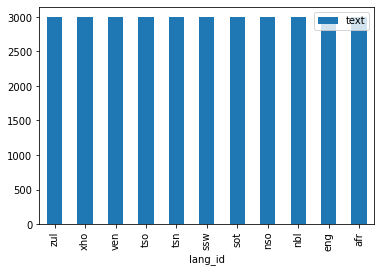

In [ ]:
a.sort_values('lang_id', ascending=False).plot(kind='bar')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train_set['text'] = df_train_set['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [ ]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_test_set['text'] = df_test_set['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [ ]:
df_train_set.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [ ]:
df_train_set.isnull().sum()

lang_id    0
text       0
dtype: int64

In [ ]:
df_train_set['text'] = df_train_set['text'].str.lower()
df_test_set['text'] = df_test_set['text'].str.lower()

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [ ]:
df_train_set['text'] = df_train_set['text'].apply(remove_punctuation)
df_test_set['text'] = df_test_set['text'].apply(remove_punctuation)

In [ ]:
df_train_set.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [ ]:
df_test_set.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


# Remove short words

In [ ]:
df_train_set['text'] = df_train_set['text'].str.findall('\w{4,}').str.join(' ')

df_test_set['text'] = df_test_set['text'].str.findall('\w{4,}').str.join(' ')

In [ ]:
df_train_set.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha kuba nobulumko bokubeka umsebenzi naphi k...
2,eng,province kwazulunatal department transport inv...
3,nso,netefatša gore file dilo moka dumelelanego tšo...
4,ven,khomishini ndinganyiso mbeu maana mulayo khomi...


In [ ]:
df_test_set.head()

,index,text
0,1,mmasepala maemo kgethegileng letlelela kgato
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana ngano vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste buitelandse valuta


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()

In [ ]:
train = count_vec.fit_transform(df_train_set['text'])
test = count_vec.transform(df_test_set['text'])

In [ ]:
print(train.shape)
print(test.shape)

(33000, 142249)
(5682, 142249)


In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
clf = MultinomialNB().fit(train, df_train_set['lang_id'])

# Make predictions

In [ ]:
predict = clf.predict(test)
predict

array(['tsn', 'nbl', 'ven', ..., 'sot', 'sot', 'nbl'], dtype='<U3')

# Save the results to a CSV file

In [ ]:
results = pd.DataFrame({'index':df_test_set['index'],'lang_id':predict})
results.to_csv('submition.csv',index=False)

In [ ]:
results.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
